Unsupervised clustering algorithm - Rueben Varghese Philip 21BAI1817

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn import cluster

Importing dataset

In [2]:
df1 = pd.read_csv('/content/sample_data/Mall_Customers.csv')
df1.head()

,CustomerID,Gender,Age,Annual_Income_(k$),Spending_Score_(1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df1.shape

(200, 5)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual_Income_(k$)      200 non-null    int64 
 4   Spending_Score_(1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Data Visualization

In [5]:
df1.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual_Income_(k$)        0
Spending_Score_(1-100)    0
dtype: int64

In [6]:
df1.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score_(1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df1.corr()

<ipython-input-7-49b3fcfeb4d1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,CustomerID,Age,Annual_Income_(k$),Spending_Score_(1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual_Income_(k$),0.977548,-0.012398,1.000000,0.009903
Spending_Score_(1-100),0.013835,-0.327227,0.009903,1.000000


Univariate Analysis

<ipython-input-8-73064ea9e3ef>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df1['Annual_Income_(k$)'])


<Axes: xlabel='Annual_Income_(k$)', ylabel='Density'>

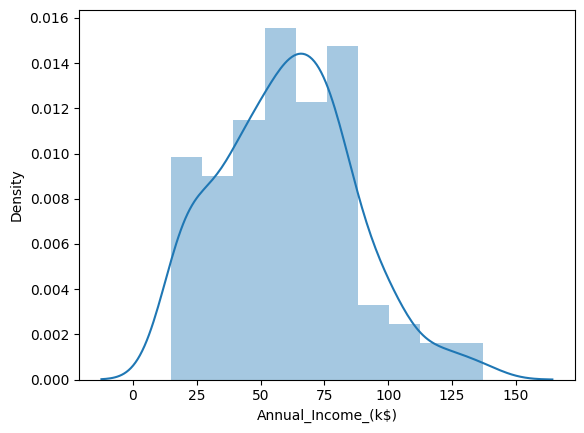

In [8]:
sb.distplot(df1['Annual_Income_(k$)'])

Bivariate Analysis

<Axes: xlabel='Annual_Income_(k$)', ylabel='Age'>

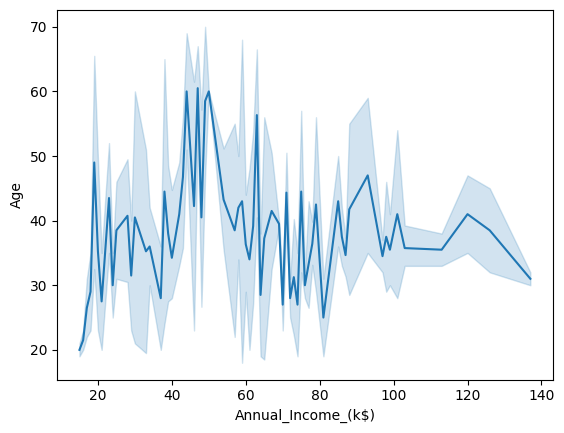

In [9]:
sb.lineplot(x=df1['Annual_Income_(k$)'], y=df1['Age'])

Multivariate Analysis

<Figure size 5000x5000 with 0 Axes>

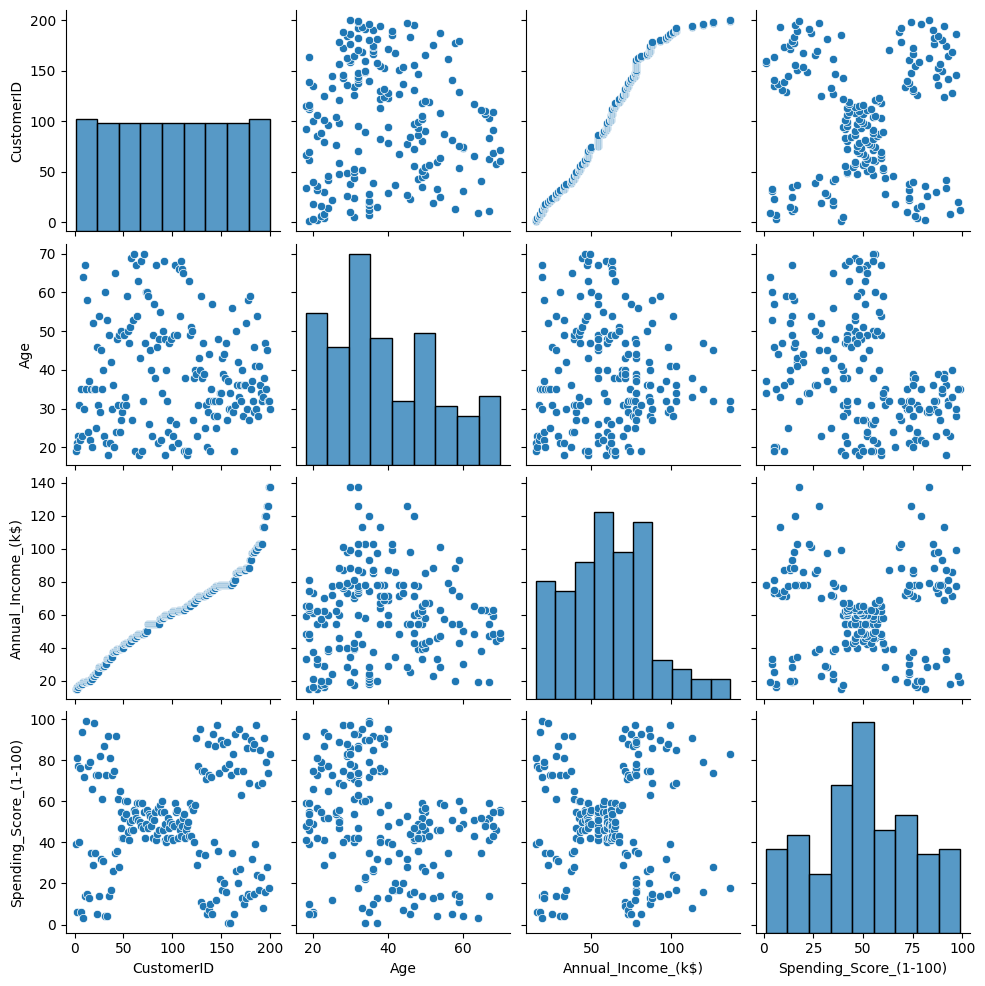

In [10]:
plt.figure(figsize=(50,50))
sb.pairplot(df1)

<ipython-input-11-b9592e18a3cf>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df1.corr(),annot=True)


<Axes: >

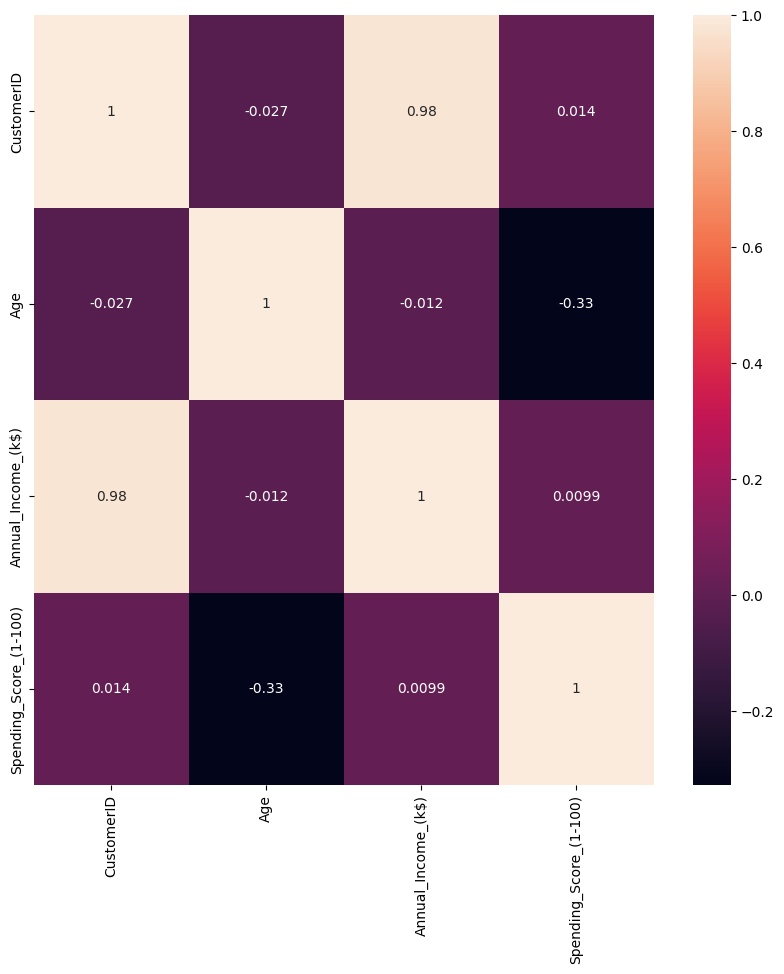

In [11]:
plt.figure(figsize=(10,10))
sb.heatmap(df1.corr(),annot=True)

<Axes: >

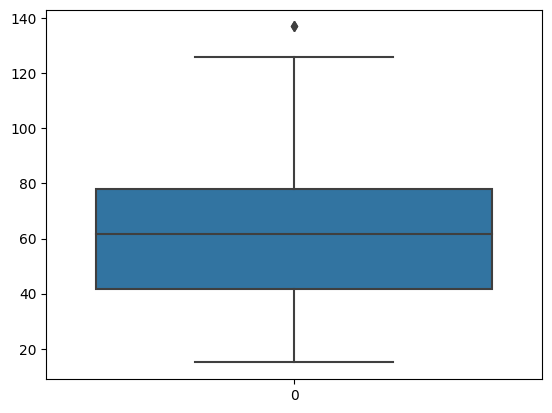

In [12]:
sb.boxplot(df1['Annual_Income_(k$)'])

In [13]:
aq1 = df1['Annual_Income_(k$)'].quantile(0.25)
aq3 = df1['Annual_Income_(k$)'].quantile(0.75)
aiqr = aq3 - aq1
a_upper_limit = aq3+(1.5)*(aiqr)
a_lower_limit = aq1-(1.5)*(aiqr)
print(aq1)
print(aq3)
print(aiqr)
print(a_upper_limit)
print(a_lower_limit)

41.5
78.0
36.5
132.75
-13.25


<Axes: >

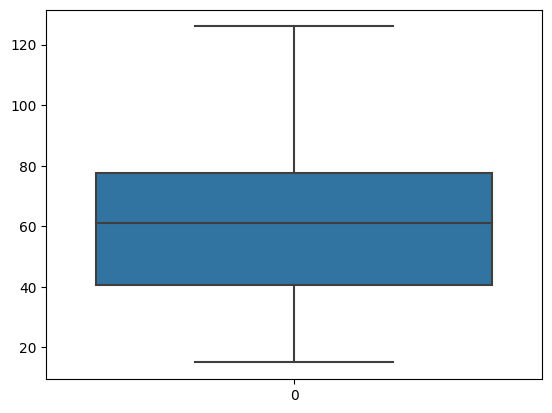

In [14]:
df1=df1[(df1['Annual_Income_(k$)']<a_upper_limit) & (df1['Annual_Income_(k$)']>a_lower_limit)]
sb.boxplot(df1['Annual_Income_(k$)'])

<Axes: >

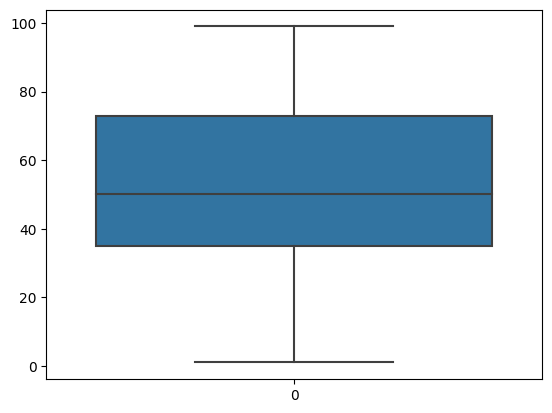

In [15]:
sb.boxplot(df1['Spending_Score_(1-100)'])

<Axes: >

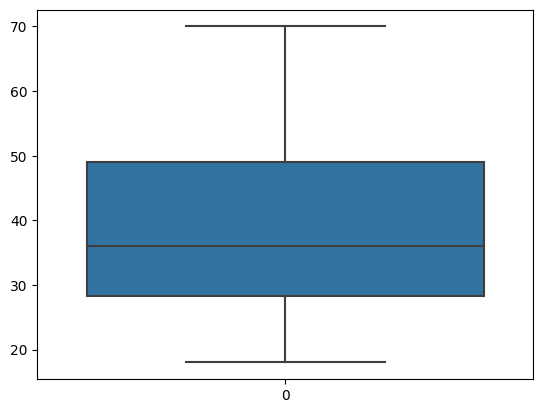

In [16]:
sb.boxplot(df1['Age'])

<Axes: >

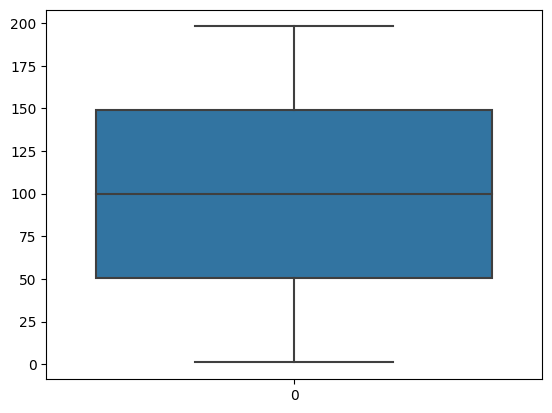

In [17]:
sb.boxplot(df1['CustomerID'])

Data Preprocessing

In [18]:
gen = {'Male':0,'Female':1}
df1['Gender'] = [gen[item] for item in df1.Gender]

<ipython-input-18-5b83769f1a55>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Gender'] = [gen[item] for item in df1.Gender]


In [19]:
x = df1.iloc[:,:-1]
x.head()

,CustomerID,Gender,Age,Annual_Income_(k$)
0,1,0,19,15
1,2,0,21,15
2,3,1,20,16
3,4,1,23,16
4,5,1,31,17


In [20]:
y = df1['Spending_Score_(1-100)']
y.head()

0    39
1    81
2     6
3    77
4    40
Name: Spending_Score_(1-100), dtype: int64

In [21]:
Y = df1['Spending_Score_(1-100)'].apply(lambda y_value: 1 if y_value<=50 else 0)
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
193    0
194    1
195    0
196    1
197    0
Name: Spending_Score_(1-100), Length: 198, dtype: int64


Elbow method

In [22]:
err=[]
for i in range(1,11):
  kmeans = cluster.KMeans(n_clusters=i,init = 'k-means++',random_state=0)
  kmeans.fit(x)
  err.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [23]:
err

[811076.2474747477,
 242961.37373737368,
 131632.83190254815,
 91432.6180999669,
 70600.86801226034,
 59867.40022106729,
 51146.099641379886,
 43056.22107961298,
 36774.045807469985,
 33075.174941579775]

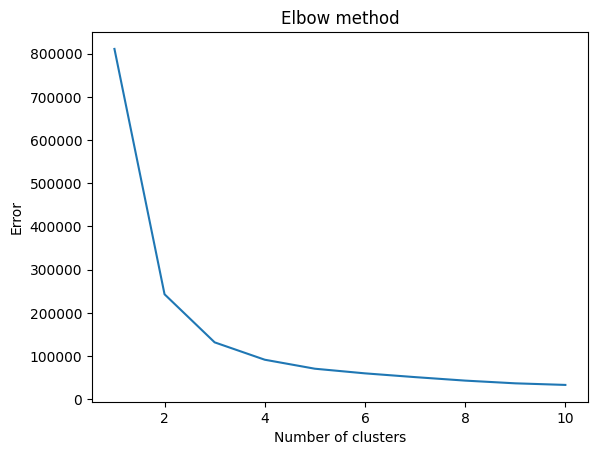

In [24]:
plt.plot(range(1,11),err)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Error')
plt.show()

K-Means Clustering Model

In [25]:
kmean = cluster.KMeans(n_clusters=3,init = 'k-means++',random_state=0)

In [26]:
kmean.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [27]:
pred = kmean.predict(x)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

Prediction with random observation

In [28]:
kmean.predict([[1.3,2.5,3.4,4.6]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1], dtype=int32)

In [29]:
kmean.predict([[2.1,3.0,1.8,4.2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1], dtype=int32)